In [1]:
import modelskill as ms

# Model skill visualisation

In [14]:
fn = 'data/SW/HKZN_local_2017_DutchCoast.dfsu'
mr = ms.ModelResult(fn, name='HKZN_local', item=0)

obs = [ms.PointObservation('data/SW/HKZA_Hm0.dfs0', item=0, x=3.9, y=52.7, name="HKZA"),
        ms.PointObservation('data/SW/HKZA_Hm0.dfs0', item=0, x=3.8, y=52.5, name="HKZA_2"),
        ms.PointObservation('data/SW/HKZA_Hm0.dfs0', item=0, x=3.5, y=52.6, name="HKZA_3"),
        ms.PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2420, y=52.6887, name="HKNA"),
        ms.PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.2, y=52.6, name="HKNA_2"),
        ms.PointObservation('data/SW/HKNA_Hm0.dfs0', item=0, x=4.3, y=52.7, name="HKNA_3"),
        ms.PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2760, y=51.9990, name="EPL"),
        ms.PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.2, y=51.9, name="EPL_2"),
        ms.PointObservation("data/SW/eur_Hm0.dfs0", item=0, x=3.3, y=51.95, name="EPL_3")
]

cc = ms.compare(obs=obs, mod=mr)
cc


<ComparerCollection>
Comparer: HKZA
Comparer: HKZA_2
Comparer: HKZA_3
Comparer: HKNA
Comparer: HKNA_2
Comparer: HKNA_3
Comparer: EPL
Comparer: EPL_2
Comparer: EPL_3

## Data analysis

In [15]:
cc.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
EPL,66,-0.066028,0.224919,0.215009,0.189791,0.969512,0.082773,0.932082
EPL_2,66,-0.176137,0.278117,0.215233,0.240594,0.968521,0.082859,0.896154
EPL_3,66,-0.066028,0.224919,0.215009,0.189791,0.969512,0.082773,0.932082
HKNA,386,-0.194260,0.351964,0.293499,0.251839,0.971194,0.094489,0.905300
HKNA_2,386,-0.296194,0.430783,0.312799,0.325512,0.969579,0.100702,0.858137
HKNA_3,386,-0.135648,0.298130,0.265482,0.210063,0.975813,0.085469,0.932054
HKZA,397,0.051763,0.285233,0.280497,0.222436,0.965938,0.096780,0.930484
HKZA_2,397,-0.006792,0.281183,0.281101,0.219259,0.966268,0.096988,0.932444
HKZA_3,397,-0.011184,0.278949,0.278725,0.218145,0.966900,0.096168,0.933514


In [16]:
s = cc.skill()
type(s)

modelskill.skill.AggregatedSkill

<Axes: title={'center': 'rmse'}, xlabel='observation'>

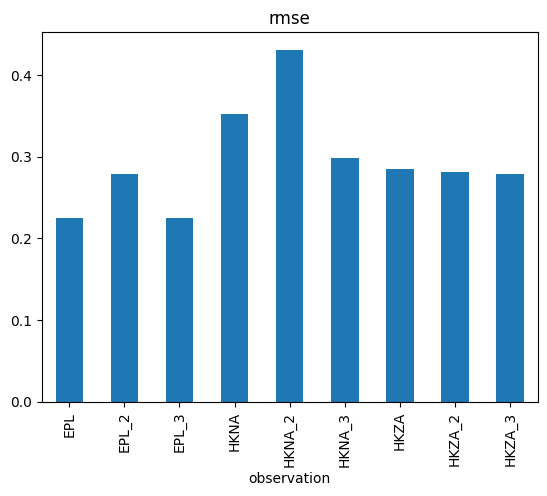

In [18]:
s.plot.bar('rmse')

[<Axes: title={'center': 'urmse'}, xlabel='observation'>]

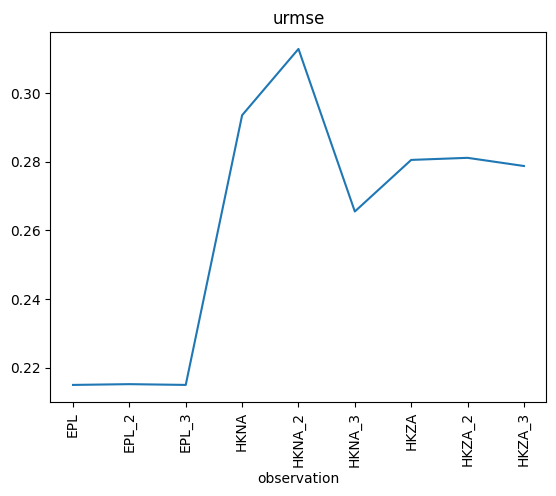

In [19]:
s.plot.line('urmse')

## Custom plot

All skill statistics are available in a dataframe, and in case you need a tailor-made plot, you can get data and use matplotlib to get exactly what you need.

In [20]:
import matplotlib.pyplot as plt

In [21]:
df = s.df.sort_values('bias')
x = df.bias
y = df.index

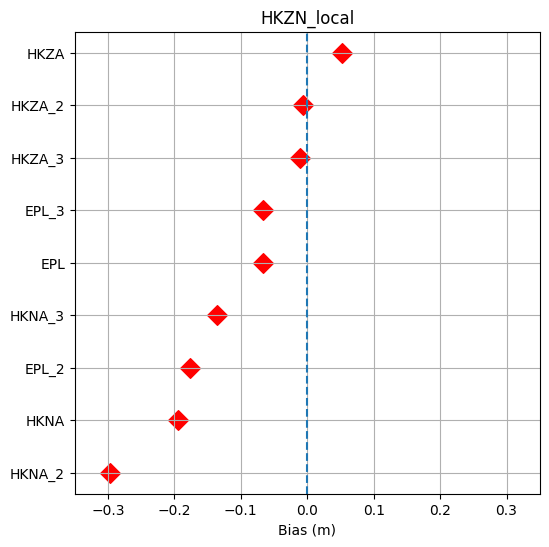

In [22]:
plt.subplots(figsize=(6,6))
plt.scatter(x,y,marker='D',c='red',s=100)
plt.xlim(-0.35,0.35)
plt.axvline(0,linestyle='--')
plt.xlabel("Bias (m)")
plt.title(mr.name)
plt.grid()